In [1]:
!unzip "/content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip"

Archive:  /content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip
  inflating: test_data.csv           
  inflating: train_data.csv          
  inflating: train_solution.csv      


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
import nltk 
from nltk.tokenize import TweetTokenizer
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)
nltk.download("stopwords")
tknzr = TweetTokenizer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df = pd.read_csv("train_data.csv")
labels = pd.read_csv("train_solution.csv")

In [4]:
df = df.merge(labels, left_on='id', right_on='id')


In [5]:
del labels

In [6]:
df.sample(10)

,id,message,category
1710,273538,Critical to Saturday.,0
3839,275667,"On the air, the shooter's kms and the man who asked about the favourite subpoena were poking his eyeballs with an elgey style, but instead of the Sionar Booooy, he started talking about the saying about the mistress, the borsch, and the pots. Well, you know, the good mistress of the borsche in any pot tastes good. Anyway, no matter what!!! Publicly, I refuse my words because today I painted the arrows of SHIT!!!!!! It's some kind of hell, I swear. If there's hell, it's where I talk to people all the time and draw the arrows with a brush. Anyway, it turns out I had a very limited function: I could draw the brand arrows with a pencil, a liquid substrate with a thin brush, and a marker-shaped liner. That's the secret to success. Why did I get in the wrong place at all? I don't know wha...",2
209,272037,"Sephora in an elochian passage: some unknown discounts on kat von d. Tone, consillers and lipsticks for 399. And I wasn't wrong in numbers. I don't know what it is, maybe the expiration date is over, but it's just a bag of gifts.",2
3075,274903,"The inviolability of white sneakers👟 in our wardrobes has not been challenged for a long time, a couple of days ago,",2
3438,275266,"On September 1st, on Knowledge Day, at 20:00, Pre-Sale (Pre-Sale) launched NFT maps with a 50% discount. Maps will be available on the day of the project &apos; s release on 1 October 2021. ♪ Oh, my God ♪",1
3145,274973,"On the eve of autumn, we are discussing the topic of cropped outerwear. It seems that we are waiting for her triumphant return in the upcoming autumn-winter season, Fall 2021 and Resort 2022 shows are full of cropped sheepskin coats, down jackets, bombers, vests, and jackets. But I want to note right away that this is NOT a bolero from 2000 - on the contrary, we choose the very voluminous silhouettes. Above is a small selection of new collections. I know that there will be many disagreements with such a length, but to mentally prepare you, I started talking about it back in the summer😂",2
1088,272916,"Although perhaps the second is true, otherwise the horse requirements would have been changed by now.",0
3508,275336,"You're out of nowhere again. In fact, I think it's my friends who pay for the services and the subscriptions so I can be a little more confident than the schoolgirl who last wears a bra in her class. But now it's about this root-painting thing yesterday. She's not a magician, but she's quite a retach. I mean, it's gonna paint. It's a really good thing if you like to go out on dates after work, and you don't like to go to a salon, or you're too smart for this world. The balcony is compact and even placed in my handbags. But be careful, it's like a schoolgirl. Maybe it's getting dirty. Karoch, if the kid decides to gently walk his hand through your hair, it's gonna take a long time to explain what's left on his fingers. If it rains, you'll get back to 2007. The pigment is very strong, so...",2
2984,274812,"There's nothing to write reviews or anything, I'm tired. I'm gonna announce the winner's powder tonight, and while you're at it, the NYX team and I have prepared a 20% discount on the full range of ULTRA20 brands on the website.",2
2924,274752,"💔 In fact, these actors had their own story. Let's be honest - a little novel. Actually, hand on heart, Marilyn wasn't Brando's type. —————————————————",2


# PRED

In [7]:
!pip install -q pymorphy2

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 6.9 MB/s 


In [8]:
import pymorphy2
from functools import lru_cache
from multiprocessing import Pool
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import re

In [9]:
m = pymorphy2.MorphAnalyzer()

regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text)
    except:
        return []

def tweeter_only(text, regex=regex):
    try:
        return tknzr.tokenize(text)
    except:
        return []
def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "    
def clean_text(text):
    return lemmatize(words_only(text))

In [15]:
df['category'].value_counts()

0    1428
2    1217
1    1199
Name: category, dtype: int64

In [16]:
df.loc[df["category"] == 2, "category"] = 0


In [17]:
df['category'].value_counts()

0    2645
1    1199
Name: category, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [19]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_train['message']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/2883 [00:00<?, ?it/s]

,id,message,category,lemmas
608,272436,"According to Acuiti, in the next two years many companies trading in traditional assets will enter the crypto market, thus contributing to the development of digital currencies. A joint study with the Bitstamp Exchange and the Chicago Commodity Exchange (CME) involved firms dealing in both traditional financial assets and crypts. Today, the implementation rate is quite low – only one in five traditional firms is trading in bitcoin, ether, or other altcoins. However, there is a growing interest among such organizations in the cryptomatic market, as they are considering becoming or expanding their presence in order to ""cover"" more assets. 97 per cent of traditional companies trading in traditional assets are ready to enter the market within two years, and 45 per cent will consider ...",1,according to acuiti in the next two years many companies trading in traditional assets will enter the crypto market thus contributing to the development of digital currencies a joint study with the bitstamp exchange and the chicago commodity exchange (cme) involved firms dealing in both traditional financial assets and crypts today the implementation rate is quite low only one in five traditional firms is trading in bitcoin ether or other altcoins however there is a growing interest among such organizations in the cryptomatic market as they are considering becoming or expanding their presence in order to cover more assets per cent of traditional companies trading in traditional assets are ready to enter the market within two years and per cent will consider this possibility in the next...
1194,273022,Or me.,0,or me
481,272309,"No, it was before",0,no it was before
2502,274330,"The Chainalysis research company has published three reports that shed light on the mechanisms that analysts use to investigate cryptocular crimes. This week, Chainalysis published three Crypto Crime Intelligence Briefs reports, which give an idea of the mechanisms used to track illegal transactions in the cryptovaleous industry. The company notes that analysts regularly identify new groups and services involved in cryptivate operations for both legitimate and criminal purposes.",1,the chainalysis research company has published three reports that shed light on the mechanisms that analysts use to investigate cryptocular crimes this week chainalysis published three crypto crime intelligence briefs reports which give an idea of the mechanisms used to track illegal transactions in the cryptovaleous industry the company notes that analysts regularly identify new groups and services involved in cryptivate operations for both legitimate and criminal purposes
908,272736,Facebook took over the old - started banning the,1,facebook took over the old started banning the
1942,273770,Now the alleged lover of the star is the singer of The Weekend. Not so long ago they spent a weekend together.,0,now the alleged lover of the star is the singer of the weekend not so long ago they spent a weekend together
3814,275642,"ANGINE CONTENT SHOCK! There's something wrong at my favorite shopping center, Magnet Cosmetic's store! A huge plastic makeup of mebeline is sold for 39 rubles. I don't want to know why, I don't want to know what's wrong with her, I don't want to know anything.",0,angine content shock! there s something wrong at my favorite shopping center magnet cosmetic s store! a huge plastic makeup of mebeline is sold for rubles i don t want to know why i don t want to know what s wrong with her i don t want to know anything
1484,273312,"My friends, if I may say so, I love a 50-pets shelter and I'm trying to sabotage it. He inspires my trust, and his wards live in love and comfort. But look who the pussy is waiting for you there. I'm sure they're cool at 50pets, but we need to look for the goons. Can you please take care of the cakes in your canals/chats?",0,my friends if i may say so i love a pets shelter and i m trying to sabotage it he inspires m

In [20]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_test['message']), total=len(X_test)))

X_test['lemmas'] = lemmas
X_test.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/961 [00:00<?, ?it/s]

,id,message,category,lemmas
370,272198,"If it were my will, we would live with our hair in the life of a surfer in the wind: they would be sturdy, dry, flying into the wind, salty, and sunny. I would never comb! Oh, wait... but, no, society dictates the rules, you have to be beautiful with shiny smooth locoons, so that the subway car doesn't take Aki from Scare from Oz. I have five ways in which, while five things can be tame even the sides that come out of the jeans: hair oil (elseve/garnier), lush vanilla air conditioner, mask, shampoo and Garnier Botanic Therapy Legendary Olive. I really like Garnier hair masks. They have textures that look like butter cream from a cake, smells about the same. Seriously, when I was a little mom, she was making an incredible honeymoon with cream cream. I was ready to eat this cream spoon, ...",0,if it were my will we would live with our hair in the life of a surfer in the wind: they would be sturdy dry flying into the wind salty and sunny i would never comb! oh wait but no society dictates the rules you have to be beautiful with shiny smooth locoons so that the subway car doesn t take aki from scare from oz i have five ways in which while five things can be tame even the sides that come out of the jeans: hair oil (elseve/garnier) lush vanilla air conditioner mask shampoo and garnier botanic therapy legendary olive i really like garnier hair masks they have textures that look like butter cream from a cake smells about the same seriously when i was a little mom she was making an incredible honeymoon with cream cream i was ready to eat this cream spoon about as much as the mask f...
1334,273162,"More than three than, anyway?",0,more than three than anyway
1697,273525,"Yesterday, she received a package from the Aiherb and at the same time there was the most beautiful and unnecessary thing on the ground — the shaded balm pixi beauty. I've got a tasty balm treatment like a combuche, like bullshit, and you always buy it before the cash register, thinking you're more of a piss piss than ever. Beautiful in the balsam is the beautiful beauty and medium mattiness of a brown nyd. It's on Victoria Bonue, reper and breakfast wives at the Zivago Cafe. You put it in and you want it in Tiffany, not at work. Or at least it's number two on the show. It's beautifully placed on top of the contours, as a child in Avon's catalogues, it was called the effect of kissed lips, closer to 30, with good experience. I'm saying that's what lips look like when you eat the hoo...",0,yesterday she received a package from the aiherb and at the same time there was the most beautiful and unnecessary thing on the ground the shaded balm pixi beauty i ve got a tasty balm treatment like a combuche like bullshit and you always buy it before the cash register thinking you re more of a piss piss than ever beautiful in the balsam is the beautiful beauty and medium mattiness of a brown nyd it s on victoria bonue reper and breakfast wives at the zivago cafe you put it in and you want it in tiffany not at work or at least it s number two on the show it s beautifully placed on top of the contours as a child in avon s catalogues it was called the effect of kissed lips closer to with good experience i m saying that s what lips look like when you eat the hood you re allergic to or d...
2857,274685,In the head.,0,in the head
3755,275583,"And yes, that's all you can do.",0,and yes that s all you can do
3643,275471,Ok. You had a deadline for thesis for a year so I still do not follow. But I will give you extension until 26 April for RA thesis submission.,0,ok you had a deadline for thesis for a year so i still do not follow but i will give you extension until april for ra thesis submission
543,272371,"California's Fentech Startup Ripple intends to achieve interoperability between XRP and Ethereum by means of the Interledger (ILP) protocol. To achieve this goal, the Xpring Investment Unit sponsored the Gitcoin virtual hackathon at the ETH Denver C

# Подход №1

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(X_train.lemmas.to_list()).toarray()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [45]:
log_reg = LogisticRegression(random_state=0, solver="newton-cg")
log_reg.fit(X, X_train['category']) 

LogisticRegression(random_state=0, solver='newton-cg')

In [ ]:
# tfidfconverter = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
# X = tfidfconverter.fit_transform(df.lemmas.to_list()).toarray()
# parameters = [{'max_iter': [100,200,300,400,500,600,1000]}]
# grid_search = GridSearchCV(estimator = log_reg,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5,
#                            verbose=0)
# grid_search.fit(X, df['category'])
# grid_search.best_params_

In [29]:
classifier = RandomForestClassifier(n_estimators=400, random_state=2)
classifier.fit(X, X_train['category']) 

RandomForestClassifier(n_estimators=400, random_state=2)

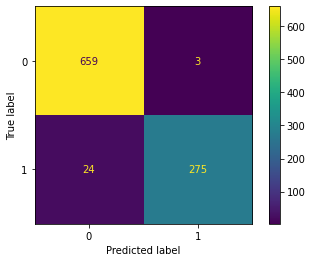

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       662
           1       0.99      0.92      0.95       299

    accuracy                           0.97       961
   macro avg       0.98      0.96      0.97       961
weighted avg       0.97      0.97      0.97       961

accuracy_score =  0.9719042663891779


In [30]:
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = classifier.predict(X_test_array)

cm = confusion_matrix(X_test['category'],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

plt.show()
print(classification_report(X_test['category'],y_pred))
print('accuracy_score = ', accuracy_score(X_test['category'], y_pred))

In [31]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler


In [32]:
X_test

,id,message,category,lemmas
1432,273260,"It's empty cans, so they're alive.",0,it s empty cans so they re alive
3661,275489,"Tutch No. Laernom Weightnom, etc.",0,tutch no laernom weightnom etc
1611,273439,"Oh, Tanya.",0,oh tanya
2364,274192,I have B But it's because she hasn't see my literature review yet 😁😁,0,i have b but it s because she hasn t see my literature review yet
2928,274756,Thank you! We'll figure it out then.,0,thank you! we ll figure it out then
...,...,...,...,...
1822,273650,Lol cupcake 300,0,lol cupcake
1830,273658,Place's ready.,0,place s ready
141,271969,"Elliptic, an analytical firm has identified illegal transactions using XRP cryptocurrencies totaling over $ 400 million. A significant part of them is connected with financial pyramids and other fraudulent schemes. According to Elliptic co-founder Tom Robinson, their company was the first to offer XRP transaction monitoring services and has already discovered several hundred accounts related to illegal activities. In total, only 0.2% of XRP accounts for illegal transactions. However, their focus is different, for example, from bitcoin, which is mainly used in darknet markets, while XRP is more often featured in questionable schemes for fast enrichment. “I suspect there are many retail investors among XRP holders, which is why they are becoming an attractive target for scammers,” said...",1,elliptic an analytical firm has identified illegal transactions using xrp cryptocurrencies totaling over million a significant part of them is connected with financial pyramids and other fraudulent schemes according to elliptic co founder tom robinson their company was the first to offer xrp transaction monitoring services and has already discovered several hundred accounts related to illegal activities in total only % of xrp accounts for illegal transactions however their focus is different for example from bitcoin which is mainly used in darknet markets while xrp is more often featured in questionable schemes for fast enrichment i suspect there are many retail investors among xrp holders which is why they are becoming an attractive target for scammers said robinson he also claims tha...
3228,275056,"🔎 Last week, we announced the Guild of Guardians Token Sale on CoinList, starting November 10, 18:00 UTC. Guild of Guardians is a multiplayer, fantasy, action RPG where players build their dream team of Guardians and compete in a guild to earn epic rewards. This week, we sat down with several contributors to Guild of Guardians to break down what they are building and how GOG, the game’s native token, is used to enhance its core gameplay loop.",1,last week we announced the guild of guardians token sale on coinlist starting november : utc guild of guardians is a multiplayer fantasy action rpg where players build their dream team of guardians and compete in a guild to earn epic rewards this week we sat down with several contributors to guild of guardians to break down what they are building and how gog the game s native token is used to enhance its core gameplay loop


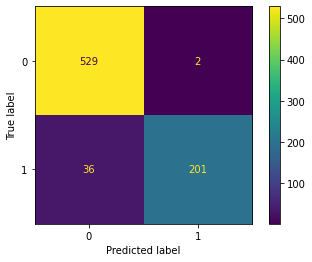

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       531
           1       0.99      0.85      0.91       237

    accuracy                           0.95       768
   macro avg       0.96      0.92      0.94       768
weighted avg       0.95      0.95      0.95       768

accuracy_score =  0.9505208333333334


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = log_reg.predict(X_test_array)

cm = confusion_matrix(X_test['category'],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()

plt.show()
print(classification_report(X_test['category'],y_pred))
print('accuracy_score = ', accuracy_score(X_test['category'], y_pred))

In [34]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['message']), total=len(df)))

df['lemmas'] = lemmas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/3844 [00:00<?, ?it/s]

In [71]:
df = df.sample(frac=1)

In [72]:
from sklearn.model_selection import KFold
X = df
y = df['category']
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [73]:
from sklearn.ensemble import BaggingClassifier

In [74]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = RandomForestClassifier(n_estimators=400, random_state=2)
    
    # clf = BaggingClassifier(base_estimator=classifier,
    #                      n_estimators=10, random_state=0)

    tfidfconverter = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
    X_extracted = tfidfconverter.fit_transform(X_train.lemmas.to_list()).toarray()
    
    sm = SMOTE(random_state=777)
    sm_xtrain_tfidf, sm_train_y = sm.fit_resample(X_extracted, y_train)
    
    
    clf.fit(X_extracted, y_train) 

    X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
    y_pred = clf.predict(X_test_array)

    print('accuracy_score = ', accuracy_score(y_test, y_pred))

accuracy_score =  0.974025974025974
accuracy_score =  0.9636363636363636
accuracy_score =  0.9844155844155844
accuracy_score =  0.9584415584415584
accuracy_score =  0.96875


KeyboardInterrupt: ignored

In [76]:
from sklearn.metrics import roc_auc_score

In [83]:
classifier = RandomForestClassifier(n_estimators=300, random_state=2)
tfidfconverter = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
X_extracted = tfidfconverter.fit_transform(X_train.lemmas.to_list()).toarray()
sm = SMOTE(random_state=777)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(X_extracted, y_train)
clf.fit(X_extracted, y_train) 
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = clf.predict(X_test_array)
print('accuracy_score = ', accuracy_score(y_test, y_pred))

accuracy_score =  0.9505208333333334


In [84]:
roc_auc_score(y_test, y_pred)

0.9265110749593293

### TRAIN in all dataset

In [87]:
classifier = RandomForestClassifier(n_estimators=300, random_state=2)
tfidfconverter = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
X_extracted = tfidfconverter.fit_transform(df.lemmas.to_list()).toarray()
sm = SMOTE(random_state=777)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(X_extracted, df.category)
clf.fit(X_extracted, df.category) 
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = clf.predict(X_test_array)

In [89]:
from joblib import dump, load
dump(clf, 'RandomForestClassifier.joblib')
dump(tfidfconverter, 'TfidfVectorizer.joblib')

['TfidfVectorizer.joblib']

In [91]:
clf = load('RandomForestClassifier.joblib')
tfidfconverter = load('TfidfVectorizer.joblib')

In [92]:
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = clf.predict(X_test_array)

In [93]:
print('accuracy_score = ', accuracy_score(y_test, y_pred))

accuracy_score =  0.9791666666666666


# Fast_text

In [94]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [95]:
def review_to_wordlist(review, remove_stopwords=False ):
    review = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", review)
    review_text = re.sub("[^a-zA-Z]"," ", review)
    # convert to lowercase and split into words using space character
    words = review_text.lower().split()
    if remove_stopwords: # remove stopwords
        stops = stopwords.words("english")
        words = [w for w in words if not w in stops]
    return(words)

def review_to_sentences(review, tokenizer, remove_stopwords=False):
    # break the review oto sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # apply the function to each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

In [96]:
sentences = []  
print("Parsing sentences from training set...")
for review in df["message"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set...


In [97]:
with open('clean_text.txt', 'w') as f:
    for s in sentences[:]:
        f.write(' '.join(s))
        f.write('\n')

In [98]:
!git clone https://github.com/facebookresearch/fastText.git
!pip3 install fastText/.

Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (944/944), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3930 (delta 854), reused 804 (delta 804), pack-reused 2986
Receiving objects: 100% (3930/3930), 8.24 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (2505/2505), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./fastText
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64

In [99]:
import fasttext
# train your model
ft_model = fasttext.train_unsupervised('clean_text.txt', minn=3, maxn=4, dim=300)

In [100]:
df.category = df.category.astype(str)

In [101]:
X = df.lemmas.tolist()
y = df.category.tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 2883
total test examples 961


In [102]:
with open('data.train.txt', 'w+') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('test.txt', 'w+') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [103]:
classifier = fasttext.train_supervised('data.train.txt')
result = classifier.test('test.txt')

print('P@1:', result[1])
print('R@1:', result[2])
print('Number of examples:', result[0])

P@1: 0.951092611862643
R@1: 0.951092611862643
Number of examples: 961


In [104]:
classifier.predict('so i m an i m gay i m a funny guy')[0][0][-1]

'0'

In [105]:
fes = classifier.predict('so i m an i m gay i m a funny guy', k=5)

In [106]:
res = []
for x in zip(*fes):
    res.append(x)

In [107]:
res.sort(key =lambda x: int(x[0].split("__label__")[-1]))

In [108]:
res

[('__label__0', 1.0000097751617432), ('__label__1', 1.028886345011415e-05)]

# Submition

In [109]:
submition = pd.read_csv('test_data.csv')

In [110]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [111]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, submition['message']), total=len(submition)))
submition['lemmas'] = lemmas
submition.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5927 [00:00<?, ?it/s]

,id,message,lemmas
3013,278690,up to 2 tonnes.,up to tonnes
3292,278969,Japan to Deny Crypto Exchange Application in Regulatory First,japan to deny crypto exchange application in regulatory first
3161,278838,It's been exactly half the time. Who has any success?),it s been exactly half the time who has any success )
1317,276989,But it's still better than it was!,but it s still better than it was!
2526,278201,Uterque has leather jackets.,uterque has leather jackets
1747,277420,What exactly isn't going on?,what exactly isn t going on
1271,276943,"On the left of each week, the description of this week is by day (what lectures/seminars)",on the left of each week the description of this week is by day (what lectures/seminars)
1359,277031,There's some questions about your formula for another X.,there s some questions about your formula for another x
3749,279426,What time's the test?,what time s the test
2384,278057,We have to cancel.,we have to cancel


In [112]:
X_ans = tfidfconverter.transform(submition.lemmas.to_list())

In [114]:
ans = clf.predict(X_ans)


In [115]:
submition['category'] = ans

In [116]:
submition

,id,message,lemmas,category
0,275672,But a lot of people have a job fair tonight.,but a lot of people have a job fair tonight,0
1,275673,"Also, I got only 4 answers on the google form ...",also i got only answers on the google form,0
2,275674,"Vladimir, when will we have seminar?",vladimir when will we have seminar,0
3,275675,"A couple at 111, too?",a couple at too,0
4,275676,"It's on Anti-buying. And again, Zara:",it s on anti buying and again zara:,0
...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:",the second thing write all questions and thoughts about statistics in this doc:,0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,can grayscale actually sell bitcoin (btc) after unlock of gbtc shares,1
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,it s not a very operational dude putting them on the schedule wednesday is the first two online,0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.",inspired by sonia miro s goddess and made a hell of a shooter lyner is a cat eyes art vision it s not exactly sturdy but it s thin enough for tv and creativa,0


In [117]:
answer = submition[['id', 'category']]

In [118]:
answer.head()

,id,category
0,275672,0
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [119]:
answer['category'].value_counts()

0    5014
1     913
Name: category, dtype: int64

In [120]:
answer.to_csv("ans.csv", index = False)

In [121]:
pd.Series(res)

0       (__label__0, 1.0000097751617432)
1    (__label__1, 1.028886345011415e-05)
dtype: object